# Protected area layer

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import fiona
import requests
import re
import json

In [19]:
df = pd.read_excel('https://storage.googleapis.com/mangrove_atlas/widget_data/Mangrove_in_WDPA_July_2022.xlsx')
df.head()

,ISO_TER,TOTAL MANGROVE AREA(HA),MANGROVE AREA PROTECTED(HA),PERCENT PROTECTED
0,ABW,45.938704,1.0,0.021768
1,AGO,28356.673109,146.0,0.005149
2,AIA,3.700790,0.0,0.000000
3,ARE,7444.860192,1323.0,0.177706
4,ASM,32.050071,0.0,0.000000


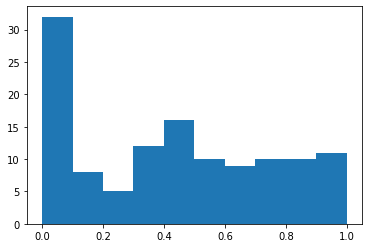

In [20]:
plt.hist(df["PERCENT PROTECTED"])
plt.show()

In [4]:
locations_file = 'https://storage.googleapis.com/mangrove_atlas/boundaries/processed/location_final/locations_v3_not_merged_with_old.gpkg'
locations = gpd.read_file(locations_file)
locations = locations[locations['type'] == 'country']
locations.head()

,name,iso,type,area_m2,wdpaid,globalid,perimeter_m,location_idn,coast_length_m,geometry
82,Qatar,QAT,country,3.880224,NaN,{AF97ABE2-6405-4438-A7ED-1494A43DA379},8.392644,06d2e6f9-bc89-59bf-a0e2-ab804e5db9fd,1345769.96,"MULTIPOLYGON (((50.73769 24.93464, 50.73779 24..."
89,Mayotte,MYT,country,5.611808,NaN,{57E86B5B-7EF0-4754-A8D4-A9DC3212D421},10.086238,0750953f-4af9-549b-aeea-329663249a56,291036.71,"POLYGON ((46.63483 -12.96039, 46.63197 -12.969..."
118,Vietnam,VNM,country,90.156489,NaN,{B2A84FBB-34CD-4A51-9463-B9DB2DB62A10},81.714911,09a1ab14-11ad-56ec-8acb-a149e5697abd,9005760.08,"MULTIPOLYGON (((104.31952 10.36051, 104.31975 ..."
132,Grenada,GRD,country,2.154728,NaN,{F8753179-5FFA-4D9E-8AD9-083F31C48528},6.743601,0b0ecb56-bb8e-5ef1-b8ee-3cdad67fed0e,260664.47,"MULTIPOLYGON (((-61.91525 11.37330, -61.91813 ..."
149,India,IND,country,473.029671,NaN,{A4A6CE4D-8D03-4246-9A2F-BD9811232115},211.564078,0c07ca53-7b17-5650-a2c6-0cc27249a4bd,16917891.22,"MULTIPOLYGON (((79.52922 9.38411, 79.52921 9.3..."


In [11]:
print(f'Protection data number of countries: {len(df)}')
print(f'Protected data ISOs in the locations file: {len(df["ISO_TER"].isin(locations["iso"]))}')

Protection data number of countries: 123
Protected data ISOs in the locations file: 123


In [12]:
df.columns = ['iso', 'mangrove_area', 'protected_area', 'pct_protected']
df.head(2)

,iso,mangrove_area,protected_area,pct_protected
0,ABW,45.938704,1.0,0.021768
1,AGO,28356.673109,146.0,0.005149


In [14]:
protected_locations = pd.merge(df, locations, on='iso', how='right')
protected_locations.head(3)

,iso,mangrove_area,protected_area,pct_protected,name,type,area_m2,wdpaid,globalid,perimeter_m,location_idn,coast_length_m,geometry
0,QAT,453.507516,409.0,0.901859,Qatar,country,3.880224,NaN,{AF97ABE2-6405-4438-A7ED-1494A43DA379},8.392644,06d2e6f9-bc89-59bf-a0e2-ab804e5db9fd,1345769.96,"MULTIPOLYGON (((50.73769 24.93464, 50.73779 24..."
1,MYT,676.035397,644.0,0.952613,Mayotte,country,5.611808,NaN,{57E86B5B-7EF0-4754-A8D4-A9DC3212D421},10.086238,0750953f-4af9-549b-aeea-329663249a56,291036.71,"POLYGON ((46.63483 -12.96039, 46.63197 -12.969..."
2,VNM,187147.224395,86140.0,0.460279,Vietnam,country,90.156489,NaN,{B2A84FBB-34CD-4A51-9463-B9DB2DB62A10},81.714911,09a1ab14-11ad-56ec-8acb-a149e5697abd,9005760.08,"MULTIPOLYGON (((104.31952 10.36051, 104.31975 ..."


In [15]:
protected_locations_gdf = gpd.GeoDataFrame(protected_locations)
protected_locations_gdf.head(3)

,iso,mangrove_area,protected_area,pct_protected,name,type,area_m2,wdpaid,globalid,perimeter_m,location_idn,coast_length_m,geometry
0,QAT,453.507516,409.0,0.901859,Qatar,country,3.880224,NaN,{AF97ABE2-6405-4438-A7ED-1494A43DA379},8.392644,06d2e6f9-bc89-59bf-a0e2-ab804e5db9fd,1345769.96,"MULTIPOLYGON (((50.73769 24.93464, 50.73779 24..."
1,MYT,676.035397,644.0,0.952613,Mayotte,country,5.611808,NaN,{57E86B5B-7EF0-4754-A8D4-A9DC3212D421},10.086238,0750953f-4af9-549b-aeea-329663249a56,291036.71,"POLYGON ((46.63483 -12.96039, 46.63197 -12.969..."
2,VNM,187147.224395,86140.0,0.460279,Vietnam,country,90.156489,NaN,{B2A84FBB-34CD-4A51-9463-B9DB2DB62A10},81.714911,09a1ab14-11ad-56ec-8acb-a149e5697abd,9005760.08,"MULTIPOLYGON (((104.31952 10.36051, 104.31975 ..."


In [16]:
protected_locations_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
protected_locations_gdf.to_file('../../../../data/protected_area_pct.geojson', driver="GeoJSON") 